In [38]:
import pandas as pd 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_validate


from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [115]:
data = pd.read_json('./datalake/input_to_model.json')

In [116]:
data

,fecha,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,valor,sitio
0,2008-02-26,8.860417,53.791667,0.0,9.020833,88,33.0,20V (20V)
1,2008-02-29,8.293478,27.369565,0.0,12.543478,61,13.0,20V (20V)
2,2008-03-03,5.885417,53.729167,0.0,8.354167,62,6.0,20V (20V)
3,2008-03-06,5.006250,15.437500,0.0,13.812500,53,38.0,20V (20V)
4,2008-03-12,7.102083,25.625000,0.0,15.958333,77,19.0,20V (20V)
...,...,...,...,...,...,...,...,...
2706,2022-09-26,1.970833,14.250000,0.0,16.979167,67,72.0,STO-D (STO-D)
2707,2022-09-26,1.970833,14.250000,0.0,16.979167,67,124.0,OROS (OROS)
2708,2022-09-26,1.970833,14.250000,0.0,16.979167,67,10.0,DOMO (DOMO)
2709,2022-09-26,1.970833,14.250000,0.0,16.979167,67,46.0,OROS2 (OROS2)


In [683]:
# for i, type in enumerate(data['sitio'].unique()):
#     p = sns.lmplot(data = data.loc[data['sitio']==type],
#             x= 'wind_speed_hi', 
#             y = 'valor', #hue = 'property_type',
#             #col='property_type', col_wrap=2,
#             line_kws={"color":"black","alpha":0.7,"lw":1},
#             palette= 'Set1')
#     p.set(title=type)
#     plt.show()

In [112]:
data=data.loc[data['sitio']=='NP3 (NP3)']

<AxesSubplot:xlabel='valor', ylabel='Count'>

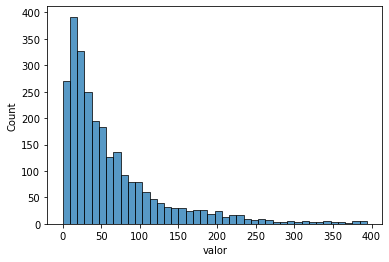

In [74]:
sns.histplot(data=data.loc[data['valor']<400], x= 'valor')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 0 to 2710
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           2711 non-null   object 
 1   temp_out        2711 non-null   float64
 2   hum_out         2711 non-null   float64
 3   rainfall_mm     2711 non-null   float64
 4   wind_speed_avg  2711 non-null   float64
 5   wind_speed_hi   2711 non-null   int64  
 6   valor           2711 non-null   float64
 7   sitio           2711 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 190.6+ KB


In [82]:
pd.get_dummies(data['sitio'])

,20V (20V),CHIN (CHIN),CIEN (CIEN),COY (COY),DCOLAS (DCOLAS),DOMO (DOMO),LIV (LIV),NP3 (NP3),NP4 (NP4),OROS (OROS),OROS2 (OROS2),S-MINA (S-MINA),STO-D (STO-D),VETA (VETA)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2707,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2708,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2709,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [119]:
data = data.loc[data['valor']<300]

In [51]:
X = pd.concat([ data.drop(['sitio', 'fecha', 'valor'], axis=1), pd.get_dummies(data['sitio'])], axis=1)

In [84]:
X

,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,20V (20V),CHIN (CHIN),CIEN (CIEN),COY (COY),DCOLAS (DCOLAS),DOMO (DOMO),LIV (LIV),NP3 (NP3),NP4 (NP4),OROS (OROS),OROS2 (OROS2),S-MINA (S-MINA),STO-D (STO-D),VETA (VETA)
0,8.860417,53.791667,0.0,9.020833,88,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.293478,27.369565,0.0,12.543478,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.885417,53.729167,0.0,8.354167,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.006250,15.437500,0.0,13.812500,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7.102083,25.625000,0.0,15.958333,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,1.970833,14.250000,0.0,16.979167,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2707,1.970833,14.250000,0.0,16.979167,67,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2708,1.970833,14.250000,0.0,16.979167,67,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2709,1.970833,14.250000,0.0,16.979167,67,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
y  = data['valor']

In [86]:
y

0        33.0
1        13.0
2         6.0
3        38.0
4        19.0
        ...  
2706     72.0
2707    124.0
2708     10.0
2709     46.0
2710      5.0
Name: valor, Length: 2711, dtype: float64

### Modelado SIN ESCALADO DE DATOS

#### Benchmark Modelo Basico Regresion Lineal

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:

def model_ev(X_train, X_test, y_train, y_test, model):
  #tabla_errores = []
  global tabla_errores, rmse_train, rmse_test, r_squared_tra, adjusted_r_squared_tra, r_squared_te, adjusted_r_squared_te, y_test_pred,y_train_pred
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train) 
  y_test_pred = model.predict(X_test)

  
  # Calculo de RMSE 
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  print(f'RMSE Train: {rmse_train}\n')
  print(f'RMSE Test: {rmse_test}\n')
  
  # Calculo de mae 
  mae_train = mean_absolute_error(y_train,y_train_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  print(f'MAE Train: {mae_train}\n')
  print(f'MAE Test: {mae_test}\n')

  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TRAIN
  SS_Residual_a = sum((y_train - y_train_pred)**2)       
  SS_Total_a = sum((y_train-np.mean(y_train))**2)     
  r_squared_tra = 1 - (float(SS_Residual_a))/SS_Total_a
  adjusted_r_squared_tra = 1 - (1-r_squared_tra)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(train)= {r_squared_tra}")
  print(f"R^2_ajt(train)= {adjusted_r_squared_tra}\n")
  
  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TEST
  SS_Residual_b = sum((y_test - y_test_pred)**2)       
  SS_Total_b = sum((y_test-np.mean(y_test))**2)     
  r_squared_te = 1 - (float(SS_Residual_b))/SS_Total_b
  adjusted_r_squared_te = 1 - (1-r_squared_te)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(test)= {r_squared_te}") 
  print(f"R^2_ajt(test)= {adjusted_r_squared_te}\n")
  
  #Histograma de los errores (y - y_predicho) para cada conjunto:
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
  sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
  plt.xlabel('errores')
  plt.legend()

  #Scatter de y vs y-predicho para lo testeado:
  ax = plt.subplot(1,2,2)
  ax.scatter(y_test,y_test_pred, s =2)

  

In [89]:
def eval_model_CV (model, descr, X_, y_, folds): 
    resultado = cross_validate(model,
                            X_,
                            y_, 
                            cv=folds, 
                            scoring = ('neg_root_mean_squared_error','r2', 'neg_mean_absolute_error'),
                            return_train_score= True 
                            ) 
    mae_test = np.mean(resultado['test_neg_mean_absolute_error']*-1)
    mae_train = np.mean(resultado['train_neg_mean_absolute_error']*-1)
    return print('MAE TEST: ',mae_test, 'MAE TRAIN: ', mae_train)

In [90]:
linreg = LinearRegression()

In [91]:
modelLreg = linreg.fit(X_train, y_train)

RMSE Train: 35.43706205820853

RMSE Test: 67.43150741552105

MAE Train: 31.29128821554254

MAE Test: 55.94590332637115

R^2(train)= 0.5059697522670569
R^2_ajt(train)= 0.4037565975636894

R^2(test)= -1.4893807237182521
R^2_ajt(test)= -2.004425011384097



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


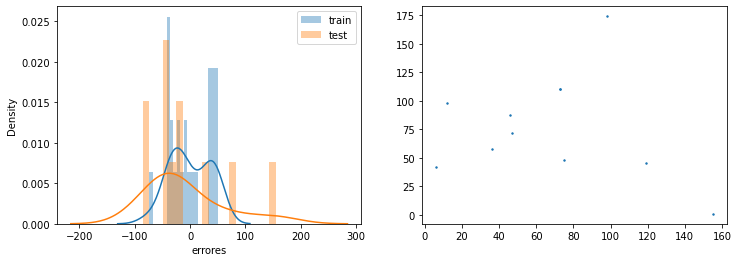

In [124]:
model_ev(X_train,X_test,y_train,y_test, modelLreg)

In [94]:
eval_model_CV(modelLreg,"Lineal, sin optimizar", X_test, y_test,10)

MAE TEST:  95.65874842766982 MAE TRAIN:  92.54339011319712


### RandomForest

In [95]:
rf = RandomForestRegressor(random_state = 42, max_depth=15)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

RMSE Train: 60.80845789364838

RMSE Test: 194.9364090125805

MAE Train: 33.93096424547917

MAE Test: 77.10414044155378

R^2(train)= 0.8336326086682673
R^2_ajt(train)= 0.8324579596770734

R^2(test)= 0.11504514298955582
R^2_ajt(test)= 0.1087968552588986



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


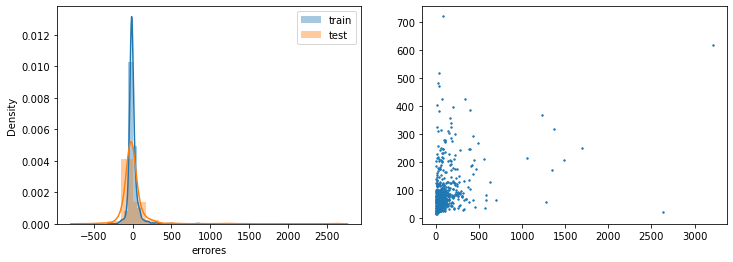

In [96]:
model_ev(X_train,X_test,y_train,y_test, rf)

In [97]:
eval_model_CV(rf,"RandomForest, sin optimizar", X_train, y_train,10)

MAE TEST:  70.68562586224716 MAE TRAIN:  33.76872221575775


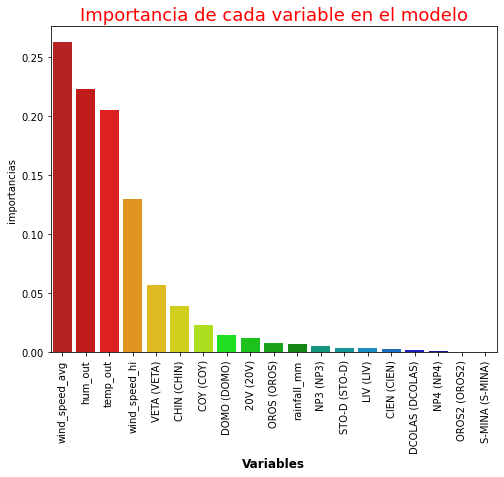

In [98]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": rf.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

In [103]:
n_estimators = [100, 150]
max_features = np.arange(0,19)
max_depth = np.arange(3,15)


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }
print(random_grid)

{'n_estimators': [100, 150], 'max_features': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}


In [104]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
                            param_distributions = random_grid, 
                            n_iter = 10, 
                            cv = 10, 
                            verbose=2, 
                            random_state=42,
                            scoring    = 'neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................
[CV] n_estimators=150, max_features=15, max_depth=12 .................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


[CV] .. n_estimators=150, max_features=15, max_depth=12, total=   0.8s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .. n_estimators=150, max_features=15, max_depth=12, total=   0.8s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .. n_estimators=150, max_features=15, max_depth=12, total=   0.8s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .. n_estimators=150, max_features=15, max_depth=12, total=   0.8s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .... n_estimators=150, max_features=0, max_depth=4, total=   0.0s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .. n_estimators=150, max_features=15, max_depth=12, total=   0.8s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .. n_estimators=150, max_features=15, max_depth=12, total=   0.8s
[CV] n_estimators=150, max_features=0, max_depth=4 ...................
[CV] .

/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/joblib/parallel.py", line 861, in 

[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] n_estimators=100, max_features=14, max_depth=8 ..................
[CV] n_estimators=100, max_features=14, max_depth=8 ..................
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] n_estimators=100, max_features=14, max_depth=8 ..................
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] n_estimators=100, max_features=14, max_depth=8 ..................
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] n_estimators=100, max_features=14, max_depth=8 ..................
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.6s
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] .. n_estimators=100, max_features=18, max_depth=11, total=   0.5s
[CV] n_estimators=100, max_features=14, max_depth=8 ..................
[CV] n

[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.5s


[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.3s
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.4s
[CV] n_estimators=150, max_features=1, max_depth=7 ...................
[CV] n_estimators=150, max_features=1, max_depth=7 ...................
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.3s
[CV] n_estimators=150, max_features=1, max_depth=7 ...................
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.4s
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.3s
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.4s
[CV] n_estimators=150, max_features=1, max_depth=7 ...................
[CV] n_estimators=150, max_features=1, max_depth=7 ...................
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.3s
[CV] n_estimators=150, max_features=1, max_depth=7 ...................
[CV] ... n_estimators=100, max_features=14, max_depth=8, total=   0.3s
[CV] n

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),
                                        'n_estimators': [100, 150]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [105]:
rf_random.best_params_

{'n_estimators': 150, 'max_features': 4, 'max_depth': 8}

In [106]:
rf_random.best_score_

-67.73845048937433

In [62]:
modelo = rf_random.best_estimator_.fit(X_train,y_train)

In [107]:
rf_op = RandomForestRegressor(n_estimators=150,
                           max_depth=8,
                           max_features=4)
rf_op.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=4, n_estimators=150)

RMSE Train: 101.71194529939675

RMSE Test: 193.47957399876225

MAE Train: 54.26143597938823

MAE Test: 75.89702270305035

R^2(train)= 0.5345380889466667
R^2_ajt(train)= 0.5312516614810356

R^2(test)= 0.1282229352670209
R^2_ajt(test)= 0.12206769029120279



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


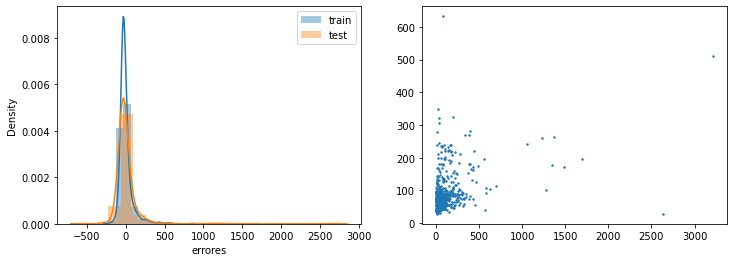

In [108]:
model_ev(X_train,X_test,y_train,y_test,rf_op)

In [73]:
y_train

879       7.00
2165      4.17
2533    787.00
1632     25.00
2348    240.00
         ...  
1638     61.00
1095     97.00
1130     27.00
1294     16.00
860     164.00
Name: valor, Length: 1897, dtype: float64

In [110]:
eval_model_CV(modelo,"RandomForest, optimizado", X_test, y_test,10)

MAE TEST:  82.27260846683427 MAE TRAIN:  43.39634617039852


In [761]:
rf_op.base_estimator_

DecisionTreeRegressor()

In [710]:
X_test

,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,CHIN (CHIN)
17326,4.443750,13.020833,0.0,6.833333,54,1
21518,5.737500,23.687500,0.0,8.791667,45,1
25662,3.950000,16.791667,0.0,7.375000,46,1
23501,7.889583,22.270833,0.0,19.625000,86,1
20491,6.108333,16.062500,0.0,3.520833,51,1
...,...,...,...,...,...,...
16890,9.183333,29.375000,0.0,4.875000,45,1
26053,7.931250,55.250000,0.0,7.354167,37,1
18984,8.758333,65.854167,0.0,6.312500,30,1
23101,3.231250,18.375000,0.0,5.354167,29,1


In [711]:
y_test

17326     30.00000
21518     33.33000
25662     84.00000
23501    433.25000
20491    195.79000
           ...    
16890     99.00000
26053    609.00000
18984      7.00000
23101     79.15000
25312     20.82917
Name: valor, Length: 680, dtype: float64

In [712]:
pd.Series(rf_op.predict(X_test))

0       32.533960
1       35.085240
2       84.789212
3      433.250000
4      188.688168
          ...    
675     94.266976
676    609.000000
677      8.207841
678     79.289115
679     21.262190
Length: 680, dtype: float64

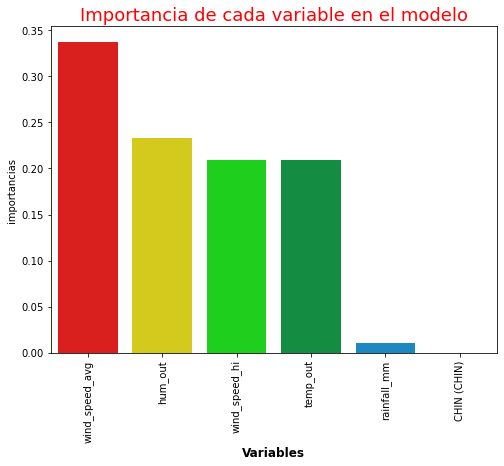

In [713]:
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": rf_op.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "nipy_spectral_r")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

In [714]:
from sklearn.ensemble import GradientBoostingRegressor

In [715]:
ensemble = GradientBoostingRegressor()
ensemble.fit(X_train, y_train)
#results = cross_validate(ensemble,X,y, cv=5, scoring = 'neg_root_mean_squared_error',return_train_score= True )

GradientBoostingRegressor()

In [716]:
eval_model_CV(ensemble, 'GBR, sin OP', X_train, y_train, 5)

MAE TEST:  78.85077053510211 MAE TRAIN:  71.86346630100391


RMSE Train: 117.20625664914726

RMSE Test: 139.26596022931952

MAE Train: 76.5980498230379

MAE Test: 85.20555078170544

R^2(train)= 0.866383136258263
R^2_ajt(train)= 0.8660282441898919

R^2(test)= 0.8082369916218156
R^2_ajt(test)= 0.807727660922272



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


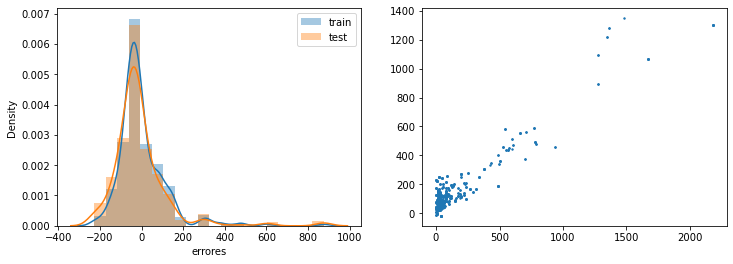

In [717]:
model_ev(X_train,X_test,y_train,y_test, ensemble)

### Pipeline

In [718]:
from sklearn import preprocessing

In [719]:
X_train

,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,CHIN (CHIN)
16145,9.489583,45.104167,12.6,4.395833,51,1
19316,7.639583,79.791667,5.4,4.729167,29,1
26041,7.931250,55.250000,0.0,7.354167,37,1
26626,4.850000,21.333333,0.0,10.500000,48,1
18668,5.554167,20.062500,0.0,19.166667,75,1
...,...,...,...,...,...,...
25794,5.881250,31.166667,0.0,6.145833,35,1
23548,7.889583,22.270833,0.0,19.625000,86,1
23780,7.400000,46.666667,0.0,8.854167,53,1
24841,9.862500,44.166667,0.0,15.875000,82,1


In [720]:
ss = preprocessing.StandardScaler()
pd.DataFrame(ss.fit_transform(X_train))

,0,1,2,3,4,5
0,0.959197,0.526254,0.647851,-0.806803,-0.160472,0.0
1,0.354716,2.322996,0.116161,-0.758691,-1.363047,0.0
2,0.450017,1.051788,-0.282607,-0.379809,-0.925747,0.0
3,-0.556770,-0.705027,-0.282607,0.074248,-0.324460,0.0
4,-0.326686,-0.770853,-0.282607,1.325159,1.151428,0.0
...,...,...,...,...,...,...
1581,-0.219813,-0.195680,-0.282607,-0.554215,-1.035072,0.0
1582,0.436403,-0.656466,-0.282607,1.391313,1.752716,0.0
1583,0.276433,0.607188,-0.282607,-0.163305,-0.051147,0.0
1584,1.081046,0.477694,-0.282607,0.850053,1.534066,0.0


In [721]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [722]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [723]:
numeric_features = X_train.columns.to_list()

In [724]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
]) 

In [725]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor(n_estimators=150,
                           max_depth=14,
                           max_features=3))
           ])

In [726]:
rf_model = pipeline.fit(X_train, y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp_out', 'hum_out',
                                                   'rainfall_mm',
                                                   'wind_speed_avg',
                                                   'wind_speed_hi',
                                                   'CHIN (CHIN)'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=14, max_features=3,
                                       n_estimators=150))])


In [727]:
from sklearn.metrics import r2_score

In [728]:
predictions = rf_model.predict(X_test)
print (r2_score(y_test, predictions))

0.9997890886436543


RMSE Train: 4.122385296859429

RMSE Test: 5.179164843546646

MAE Train: 2.3436972986182316

MAE Test: 2.8790775225282035

R^2(train)= 0.9998347060935944
R^2_ajt(train)= 0.9998342670659545

R^2(test)= 0.9997347872819079
R^2_ajt(test)= 0.999734082865658



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


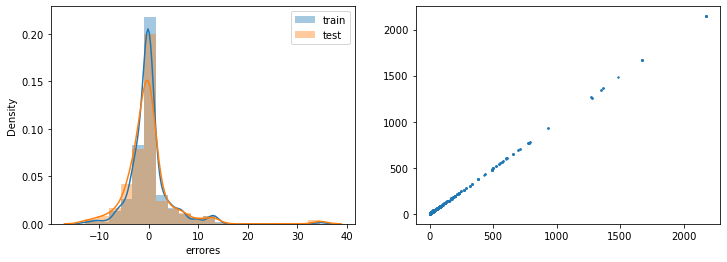

In [729]:
model_ev(X_train,X_test,y_train,y_test, rf_model)

In [730]:
eval_model_CV(rf_model, 'GBR, sin OP', X_train, y_train, 5)

MAE TEST:  5.647343177501088 MAE TRAIN:  3.689839913754264


In [ ]:
# # init your shell first
# conda init zsh
# source ~/.zshrc # refresh your shell
# source activate base # (optional, on linux) activate base env

In [121]:
data['sitio'].unique()

array(['20V (20V)', 'VETA (VETA)', 'COY (COY)', 'NP3 (NP3)', 'NP4 (NP4)',
       'LIV (LIV)', 'CHIN (CHIN)', 'STO-D (STO-D)', 'OROS (OROS)',
       'CIEN (CIEN)', 'DOMO (DOMO)', 'S-MINA (S-MINA)', 'OROS2 (OROS2)',
       'DCOLAS (DCOLAS)'], dtype=object)

Sitio modelado: 20V (20V)
MAE TEST:  48.27922127969912 MAE TRAIN:  20.088696434074254
RMSE Train: 26.576707471918787

RMSE Test: 58.08567179793639

MAE Train: 20.827897796832023

MAE Test: 48.12277383516271

R^2(train)= 0.8052574799482776
R^2_ajt(train)= 0.8029252341991551

R^2(test)= -0.06052390396824214
R^2_ajt(test)= -0.07322478904570606



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Sitio modelado: VETA (VETA)
MAE TEST:  71.74132560589126 MAE TRAIN:  26.725717011145868
RMSE Train: 32.908319846972844

RMSE Test: 76.60906913452015

MAE Train: 26.818630023695437

MAE Test: 61.43296907810657

R^2(train)= 0.839261210305537
R^2_ajt(train)= 0.8279149427976926

R^2(test)= -0.03169166905665599
R^2_ajt(test)= -0.10451696334300808




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: COY (COY)
MAE TEST:  22.500326194282543 MAE TRAIN:  9.328890624505744
RMSE Train: 13.05553780191073

RMSE Test: 36.863027162522776

MAE Train: 9.462487222794737

MAE Test: 25.249093053678116

R^2(train)= 0.8287309856851109
R^2_ajt(train)= 0.8265990062538052

R^2(test)= 0.04012675031977331
R^2_ajt(test)= 0.02817812065570402



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Sitio modelado: NP3 (NP3)
MAE TEST:  39.60493512231371 MAE TRAIN:  15.27958445917692
RMSE Train: 20.619881989511363

RMSE Test: 59.151638934577626

MAE Train: 15.458520569170632

MAE Test: 43.309703638904395

R^2(train)= 0.8573027528139545
R^2_ajt(train)= 0.8555153133919999

R^2(test)= 0.0730289803191585
R^2_ajt(test)= 0.061417652306454906



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Sitio modelado: NP4 (NP4)
MAE TEST:  37.34148103624401 MAE TRAIN:  13.991893441574977
RMSE Train: 20.13327199456512

RMSE Test: 40.8664995346176

MAE Train: 14.333893606270829

MAE Test: 30.98062217584213

R^2(train)= 0.8430372908429521
R^2_ajt(train)= 0.838977910433718

R^2(test)= 0.05376051455840791
R^2_ajt(test)= 0.029288803728021895




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: LIV (LIV)
MAE TEST:  45.56964967963718 MAE TRAIN:  17.024118943300067
RMSE Train: 21.798188274153045

RMSE Test: 52.711486857722704

MAE Train: 17.357911298550746

MAE Test: 40.262670537777765

R^2(train)= 0.8132661950752855
R^2_ajt(train)= 0.8010879034497607

R^2(test)= 0.11408004061938071
R^2_ajt(test)= 0.056302651964122874




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: CHIN (CHIN)
MAE TEST:  53.04950395323938 MAE TRAIN:  19.71327574787075
RMSE Train: 25.15086911691622

RMSE Test: 74.96101519570837

MAE Train: 19.6178112473256

MAE Test: 53.778001636757494

R^2(train)= 0.847999966219345
R^2_ajt(train)= 0.8425388871613575

R^2(test)= -0.2706490139587947
R^2_ajt(test)= -0.31630107434054766




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: STO-D (STO-D)
MAE TEST:  36.460132213594854 MAE TRAIN:  12.979626022627889
RMSE Train: 18.584810436438545

RMSE Test: 38.1755661228462

MAE Train: 12.82607847774146

MAE Test: 27.195846774120238

R^2(train)= 0.8563813006365208
R^2_ajt(train)= 0.8508575045071562

R^2(test)= 0.06472875540457723
R^2_ajt(test)= 0.028756784458599527




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: OROS (OROS)
MAE TEST:  53.75264566888889 MAE TRAIN:  18.460664684289565
RMSE Train: 26.138534927491996

RMSE Test: 74.08882201893094

MAE Train: 18.785165923028885

MAE Test: 48.188745377777785

R^2(train)= 0.8523515751582942
R^2_ajt(train)= 0.8414146547996493

R^2(test)= 0.1658937969698585
R^2_ajt(test)= 0.10410815230095927



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Sitio modelado: CIEN (CIEN)
MAE TEST:  68.19696693533334 MAE TRAIN:  23.92450069407353
RMSE Train: 30.86059294528552

RMSE Test: 59.04881734209581

MAE Train: 24.418516559770108

MAE Test: 45.615039476923066

R^2(train)= 0.8562751293792807
R^2_ajt(train)= 0.8450757888114325

R^2(test)= 0.17383908586486763
R^2_ajt(test)= 0.10946291073745462




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: DOMO (DOMO)
MAE TEST:  52.86056925216487 MAE TRAIN:  19.68192558992956
RMSE Train: 24.90073293926165

RMSE Test: 74.09600804674633

MAE Train: 19.315676920597742

MAE Test: 61.390657155955694

R^2(train)= 0.8407943911158003
R^2_ajt(train)= 0.8311455663349397

R^2(test)= 0.0478446362277305
R^2_ajt(test)= -0.009861749455437385




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Sitio modelado: OROS2 (OROS2)
MAE TEST:  36.562 MAE TRAIN:  13.255462450592887
RMSE Train: 20.01762756505709

RMSE Test: 49.53938818574753

MAE Train: 13.172

MAE Test: 41.324848484848495

R^2(train)= 0.8423611233503283
R^2_ajt(train)= 0.8097461833538445

R^2(test)= -0.3435903101161013
R^2_ajt(test)= -0.6215745122090879




/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


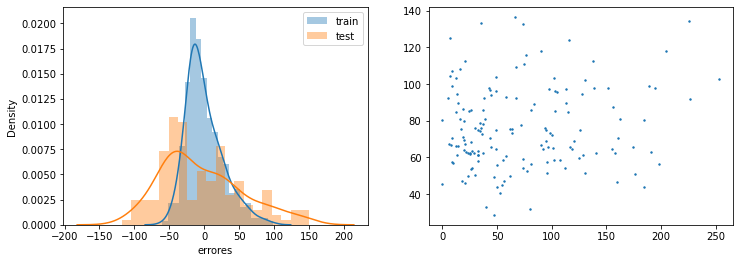

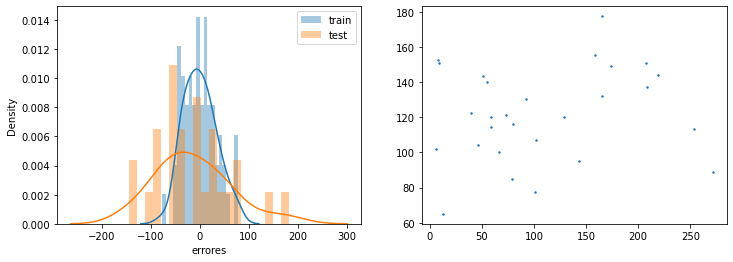

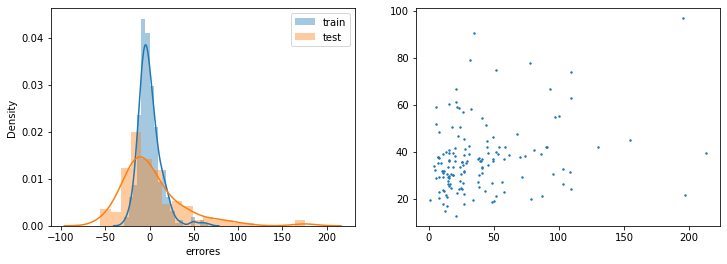

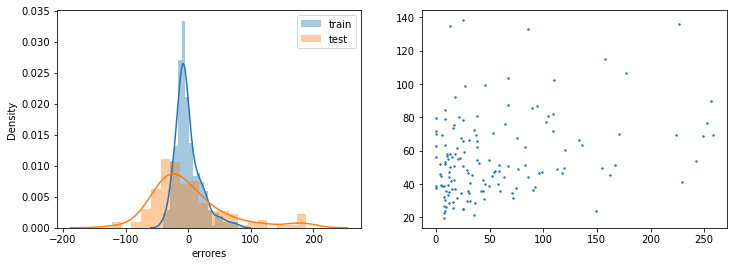

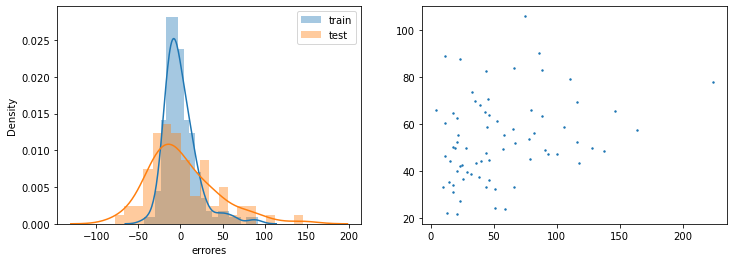

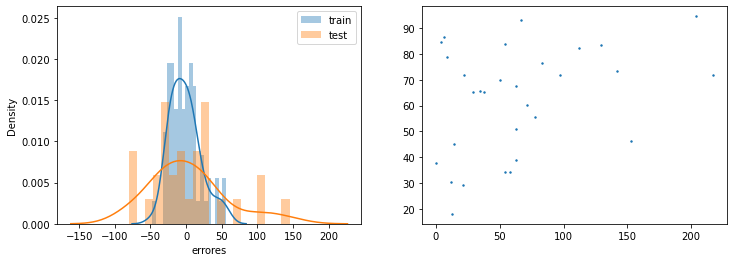

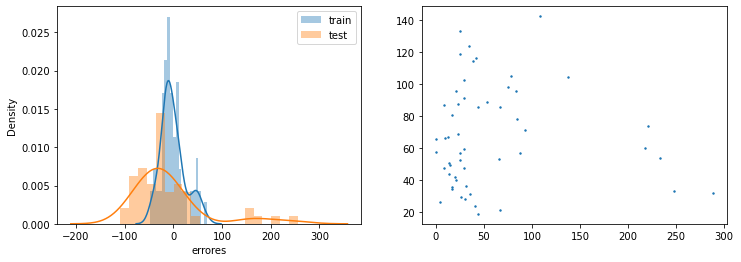

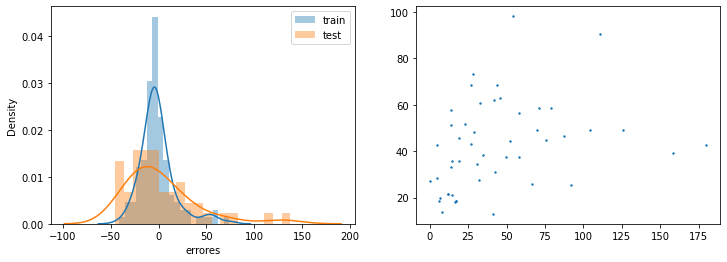

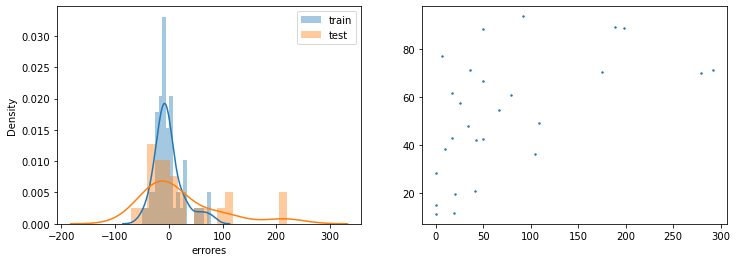

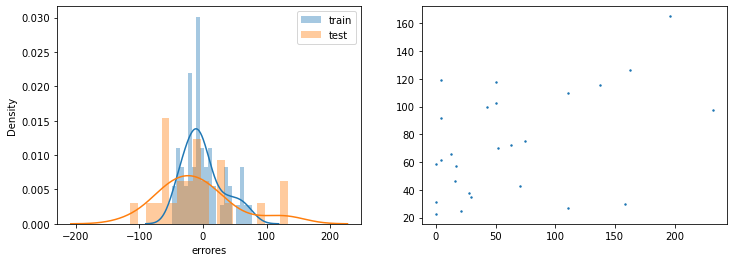

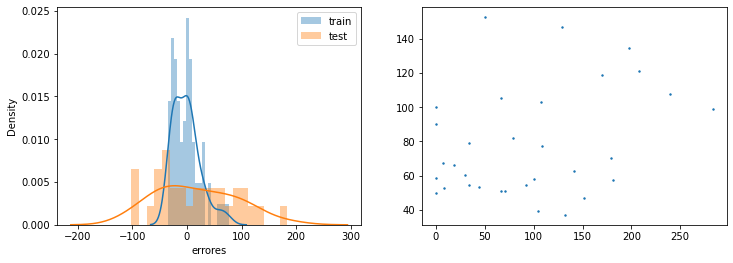

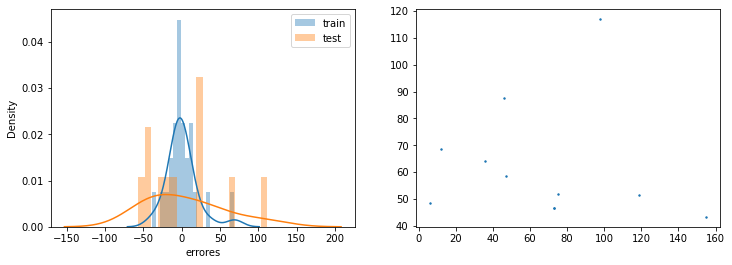

In [123]:
for sitio in ['20V (20V)', 'VETA (VETA)', 'COY (COY)', 'NP3 (NP3)', 'NP4 (NP4)','LIV (LIV)', 'CHIN (CHIN)', 'STO-D (STO-D)', 'OROS (OROS)','CIEN (CIEN)', 'DOMO (DOMO)',  'OROS2 (OROS2)']:
    dataf=data.loc[data['sitio']==sitio]
    X = pd.concat([ dataf.drop(['sitio', 'fecha', 'valor'], axis=1), pd.get_dummies(dataf['sitio'])], axis=1)
    y  = dataf['valor']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf_op = RandomForestRegressor(n_estimators=150,
                           max_depth=14,
                           max_features=3)
    rf_op.fit(X_train,y_train)
    print('Sitio modelado: {}'.format(sitio))
    eval_model_CV(rf_op,"RandomForest, optimizado", X_train, y_train,10)
    model_ev(X_train,X_test,y_train,y_test, rf_op)
    print('=======\n')

In [118]:
data['sitio'].value_counts()

20V (20V)          522
NP3 (NP3)          499
COY (COY)          497
NP4 (NP4)          240
CHIN (CHIN)        206
STO-D (STO-D)      166
VETA (VETA)        125
DOMO (DOMO)        119
LIV (LIV)          100
OROS (OROS)         95
CIEN (CIEN)         86
OROS2 (OROS2)       36
DCOLAS (DCOLAS)     15
S-MINA (S-MINA)      5
Name: sitio, dtype: int64

In [9]:
data = pd.read_json('./datalake/input_to_model.json')

In [10]:
data

,fecha,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,valor,sitio
0,2008-02-26,8.860417,53.791667,0,9.020833,88,33.0,20V (20V)
1,2008-02-26,8.860417,53.791667,0,9.020833,88,33.0,20V (20V)
2,2008-02-26,8.860417,53.791667,0,9.020833,88,33.0,20V (20V)
3,2008-02-26,8.860417,53.791667,0,9.020833,88,33.0,20V (20V)
4,2008-02-26,8.860417,53.791667,0,9.020833,88,33.0,20V (20V)
...,...,...,...,...,...,...,...,...
32527,2022-09-26,1.970833,14.250000,0,16.979167,67,10.0,DOMO (DOMO)
32528,2022-09-26,1.970833,14.250000,0,16.979167,67,5.0,20V (20V)
32529,2022-09-26,1.970833,14.250000,0,16.979167,67,10.0,DOMO (DOMO)
32530,2022-09-26,1.970833,14.250000,0,16.979167,67,124.0,OROS (OROS)


In [11]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [36]:
data['sitio'].values.reshape(-1, 1)

array([['20V (20V)'],
       ['20V (20V)'],
       ['20V (20V)'],
       ...,
       ['DOMO (DOMO)'],
       ['OROS (OROS)'],
       ['STO-D (STO-D)']], dtype=object)

In [37]:
OneHotEncoder(drop='if_binary').fit(data['sitio'].values.reshape(-1, 1))

OneHotEncoder(drop='if_binary')

In [18]:
X = data.drop(['valor', 'fecha'], axis=1)

In [19]:
X

,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,sitio
0,8.860417,53.791667,0,9.020833,88,20V (20V)
1,8.860417,53.791667,0,9.020833,88,20V (20V)
2,8.860417,53.791667,0,9.020833,88,20V (20V)
3,8.860417,53.791667,0,9.020833,88,20V (20V)
4,8.860417,53.791667,0,9.020833,88,20V (20V)
...,...,...,...,...,...,...
32527,1.970833,14.250000,0,16.979167,67,DOMO (DOMO)
32528,1.970833,14.250000,0,16.979167,67,20V (20V)
32529,1.970833,14.250000,0,16.979167,67,DOMO (DOMO)
32530,1.970833,14.250000,0,16.979167,67,OROS (OROS)


In [21]:
y = data['valor']

In [22]:
y

0         33.0
1         33.0
2         33.0
3         33.0
4         33.0
         ...  
32527     10.0
32528      5.0
32529     10.0
32530    124.0
32531     72.0
Name: valor, Length: 32532, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RMSE Train: 160.22687325738374

RMSE Test: 166.6903667815868

MAE Train: 73.15142806300464

MAE Test: 74.43736510890382

R^2(train)= 0.07532584020414745
R^2_ajt(train)= 0.0751552623422328

R^2(test)= 0.07586321828439813
R^2_ajt(test)= 0.07569273955448907



/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Caskroom/miniconda/base/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


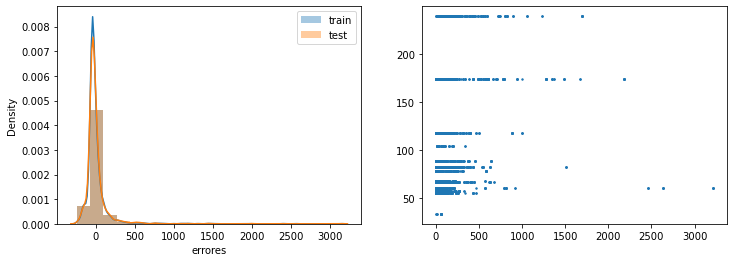

In [31]:
model_ev(X_train,X_test,y_train,y_test, regresor)